In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import os
import matplotlib.pyplot as plt
import torch

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Autenticazione con scope più ampi
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import time

# Autenticazione migliorata
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_id = '1gtE_lNw4MYiarzIu4qVAo-uu6aSzxS1d'
os.makedirs('/content/ndpi_files', exist_ok=True)

# Definisci gli array
B = [
    "M-1.ndpi",
    "M-104.ndpi","M-105.ndpi","M-108.ndpi",
    "M-112.ndpi","M-121.ndpi","M-24.ndpi","M-30.ndpi",
    "M-32.ndpi","M-36.ndpi",
]
E = [
    "M-10.ndpi",
    "M-100.ndpi","M-102.ndpi","M-103.ndpi",
    "M-107.ndpi","M-109.ndpi","M-11.ndpi","M-110.ndpi",
    "M-111.ndpi","M-113.ndpi",
]
S = [
    "M-101.ndpi",
    "M-114.ndpi","M-65.ndpi","M-86.ndpi","M-87.ndpi",
]

base_dir = '/content/ndpi_files'
for sub in ('B','E','S'):
    os.makedirs(os.path.join(base_dir, sub), exist_ok=True)

# Lista file con gestione errori
try:
    file_list = drive.ListFile({
        'q': f"'{folder_id}' in parents and trashed=false",
        'orderBy': 'title'
    }).GetList()
except Exception as e:
    print(f"Errore nel listare i file: {e}")
    exit()

# Crea dizionario per mappare i file
file_dict = {f['title']: f for f in file_list}
order_map = {'B': B, 'E': E, 'S': S}

# Download con retry e gestione errori
def download_with_retry(file_obj, dest_path, max_retries=3):
    for attempt in range(max_retries):
        try:
            print(f"Tentativo {attempt + 1} di download per {file_obj['title']}")
            file_obj.GetContentFile(dest_path)
            return True
        except Exception as e:
            print(f"Errore tentativo {attempt + 1}: {e}")
            if attempt < max_retries - 1:
                time.sleep(2 ** attempt)  # Exponential backoff
            else:
                print(f"Fallito download di {file_obj['title']} dopo {max_retries} tentativi")
                return False

for category, file_names in order_map.items():
    for file_name in file_names:
        if file_name in file_dict:
            f = file_dict[file_name]
            dest = os.path.join(base_dir, category, file_name)
            print(f"Scarico {file_name} in {category} …")

            # Verifica permessi del file
            try:
                permissions = f.GetPermissions()
                print(f"Permessi per {file_name}: {len(permissions)} permessi trovati")
            except:
                print(f"Impossibile verificare permessi per {file_name}")

            download_with_retry(f, dest)
# Autenticazione con scope più ampi
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import time

# Autenticazione migliorata
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_id = '1gtE_lNw4MYiarzIu4qVAo-uu6aSzxS1d'
os.makedirs('/content/ndpi_files', exist_ok=True)

# Definisci gli array
B = [
    "M-1.ndpi",
    "M-104.ndpi","M-105.ndpi","M-108.ndpi",
    "M-112.ndpi","M-121.ndpi","M-24.ndpi","M-30.ndpi",
    "M-32.ndpi","M-36.ndpi",
]
E = [
    "M-10.ndpi",
    "M-100.ndpi","M-102.ndpi","M-103.ndpi",
    "M-107.ndpi","M-109.ndpi","M-11.ndpi","M-110.ndpi",
    "M-111.ndpi","M-113.ndpi",
]
S = [
    "M-101.ndpi",
    "M-114.ndpi","M-65.ndpi","M-86.ndpi","M-87.ndpi",
]

base_dir = '/content/ndpi_files'
for sub in ('B','E','S'):
    os.makedirs(os.path.join(base_dir, sub), exist_ok=True)

# Lista file con gestione errori
try:
    file_list = drive.ListFile({
        'q': f"'{folder_id}' in parents and trashed=false",
        'orderBy': 'title'
    }).GetList()
except Exception as e:
    print(f"Errore nel listare i file: {e}")
    exit()

# Crea dizionario per mappare i file
file_dict = {f['title']: f for f in file_list}
order_map = {'B': B, 'E': E, 'S': S}

# Download con retry e gestione errori
def download_with_retry(file_obj, dest_path, max_retries=3):
    for attempt in range(max_retries):
        try:
            print(f"Tentativo {attempt + 1} di download per {file_obj['title']}")
            file_obj.GetContentFile(dest_path)
            return True
        except Exception as e:
            print(f"Errore tentativo {attempt + 1}: {e}")
            if attempt < max_retries - 1:
                time.sleep(2 ** attempt)  # Exponential backoff
            else:
                print(f"Fallito download di {file_obj['title']} dopo {max_retries} tentativi")
                return False

for category, file_names in order_map.items():
    for file_name in file_names:
        if file_name in file_dict:
            f = file_dict[file_name]
            dest = os.path.join(base_dir, category, file_name)
            print(f"Scarico {file_name} in {category} …")

            # Verifica permessi del file
            try:
                permissions = f.GetPermissions()
                print(f"Permessi per {file_name}: {len(permissions)} permessi trovati")
            except:
                print(f"Impossibile verificare permessi per {file_name}")

            download_with_retry(f, dest)


Scarico M-86.ndpi in S …
Permessi per M-86.ndpi: 2 permessi trovati
Tentativo 1 di download per M-86.ndpi
Scarico M-1.ndpi in B …
Permessi per M-1.ndpi: 2 permessi trovati
Tentativo 1 di download per M-1.ndpi
Errore tentativo 1: Cannot download file: {'content-type': 'application/json; charset=UTF-8', 'x-guploader-uploadid': 'ABgVH898zAq4iUA42IuKyMblpbchZLNVwsBeDFYXl6pdWQWM6zsqRwGfQ5Yj6n7DeldOGYPM', 'cache-control': 'private, max-age=0', 'date': 'Wed, 28 May 2025 09:55:28 GMT', 'expires': 'Wed, 28 May 2025 09:55:28 GMT', 'server': 'ESF', 'vary': 'Origin, X-Origin', 'x-content-type-options': 'nosniff', 'x-frame-options': 'SAMEORIGIN', 'x-xss-protection': '0', 'content-length': '356', 'status': '403'}
Tentativo 2 di download per M-1.ndpi


KeyboardInterrupt: 

In [ ]:
!pip install openslide-python openslide-bin
import openslide

import glob

ndpi_path_b = glob.glob('/content/ndpi_files/B/*.ndpi')[0]
slide_b = openslide.OpenSlide(ndpi_path_b)
ndpi_path_e = glob.glob('/content/ndpi_files/E/*.ndpi')[0]
slide_e = openslide.OpenSlide(ndpi_path_e)
ndpi_path_s = glob.glob('/content/ndpi_files/S/*.ndpi')[0]
slide_s = openslide.OpenSlide(ndpi_path_s)

print("Dimensione B livello 0:", slide_b.level_dimensions[0])
print("Dimensione E livello 0:", slide_e.level_dimensions[0])
print("Dimensione S livello 0:", slide_s.level_dimensions[0])



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 56.2 MB/s eta 0:00:00
Dimensione B livello 0: (57600, 53504)
Dimensione E livello 0: (59520, 50688)
Dimensione S livello 0: (55680, 53504)


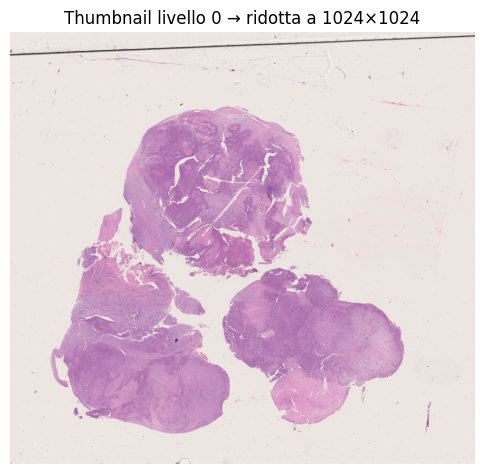

In [ ]:
# Crea una miniatura con lato massimo 1024px
thumb = slide_b.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


In [ ]:
!git clone https://github.com/LucaIanniello/MLIAProject.git

Cloning into 'MLIAProject'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 204 (delta 32), reused 59 (delta 20), pack-reused 133 (from 1)
Receiving objects: 100% (204/204), 48.90 MiB | 31.91 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

!conda env create -f MLIAProject/CLAM/env.yml
!conda install -n clam_latest -c conda-forge openslide
!conda install -n clam_latest -c conda-forge openslide-tools libopenslide0 libtiff-dev libjpeg-dev
!conda run -n clam_latest python --version
!conda run -n clam_latest pip list

!apt-get update
!apt-get install -y openslide-tools libopenslide0 libtiff-dev libjpeg-dev

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



python-3.10.0        | 29.8 MB   | :   0% 0/1 [00:00<?, ?it/s]
tk-8.6.13            | 3.1 MB    | :   0% 0/1 [00:00<?, ?it/s]

openssl-3.5.0        | 3.0 MB    | :   0% 0/1 [00:00<?, ?it/s]


pip-25.1.1           | 1.2 MB    | :   0% 0/1 [00:00<?, ?it/s]



libsqlite-3.49.2     | 895 KB    | :   0% 0/1 [00:00<?, ?it/s]




ncurses-6.5          | 871 KB    | :   0% 0/1 [00:00<?, ?it/s]





sqlite-3.49.2        | 840 KB    | :   0% 0/1 [00:00<?, ?it/s]






libgcc-15.1.0     

In [ ]:

!conda --version
!which conda
!conda config --show-sources
!conda env update -n base -f MLIAProject/CLAM/env.yml


conda 24.11.2
/usr/local/bin/conda
==> /usr/local/.condarc <==
channels:
  - conda-forge
always_yes: True

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | failed

SpecsConfigurationConflictError: Requested specs conflict with configured specs.
  requested specs: 
    - pip
    - python==3.10
  pinned specs: 
    - cuda-version=12
    - python=3.11
    - python_abi=3.11[build=*cp311*]
Use 'conda config --show-sources' to look for 'pinned_specs' and 'track_features'
configuration parameters.  Pinned specs may also be defined in the file
/usr/local/conda-meta/pinned.




In [ ]:
!cp -r MLIAProject/presets .

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/B/ \
    --save_dir results/RESULTS_DIRECTORY_12_B \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th12.csv



source:  ndpi_files/B/
patch_save_dir:  results/RESULTS_DIRECTORY_12_B/patches
mask_save_dir:  results/RESULTS_DIRECTORY_12_B/masks
stitch_save_dir:  results/RESULTS_DIRECTORY_12_B/stitches
source : ndpi_files/B/
save_dir : results/RESULTS_DIRECTORY_12_B
patch_save_dir : results/RESULTS_DIRECTORY_12_B/patches
mask_save_dir : results/RESULTS_DIRECTORY_12_B/masks
stitch_save_dir : results/RESULTS_DIRECTORY_12_B/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(12), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/9
processing M-1.ndpi
Creating patches for:  M-1 ...
Total number of contours to process:  5
Bounding Box: 30272 32768 31873 18241
Contou

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/E/ \
    --save_dir results/RESULTS_DIRECTORY_12_E \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th12.csv



source:  ndpi_files/E/
patch_save_dir:  results/RESULTS_DIRECTORY_12_E/patches
mask_save_dir:  results/RESULTS_DIRECTORY_12_E/masks
stitch_save_dir:  results/RESULTS_DIRECTORY_12_E/stitches
source : ndpi_files/E/
save_dir : results/RESULTS_DIRECTORY_12_E
patch_save_dir : results/RESULTS_DIRECTORY_12_E/patches
mask_save_dir : results/RESULTS_DIRECTORY_12_E/masks
stitch_save_dir : results/RESULTS_DIRECTORY_12_E/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(12), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/8
processing M-10.ndpi
Creating patches for:  M-10 ...
Total number of contours to process:  4
Bounding Box: 11008 24896 36801 20161
Cont

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/S/ \
    --save_dir results/RESULTS_DIRECTORY_12_S \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th12.csv



source:  ndpi_files/S/
patch_save_dir:  results/RESULTS_DIRECTORY_12_S/patches
mask_save_dir:  results/RESULTS_DIRECTORY_12_S/masks
stitch_save_dir:  results/RESULTS_DIRECTORY_12_S/stitches
source : ndpi_files/S/
save_dir : results/RESULTS_DIRECTORY_12_S
patch_save_dir : results/RESULTS_DIRECTORY_12_S/patches
mask_save_dir : results/RESULTS_DIRECTORY_12_S/masks
stitch_save_dir : results/RESULTS_DIRECTORY_12_S/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(12), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/5
processing M-101.ndpi
Creating patches for:  M-101 ...
Total number of contours to process:  6
Bounding Box: 36544 34816 10689 6977
Con

In [ ]:
from google.colab import drive
import shutil
import os

# Monta Google Drive se non è già montato
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

def copy_folder_to_drive(source_folder, destination_path, folder_name=None):
    """
    Copia una cartella locale di Colab in Google Drive

    Args:
        source_folder: percorso della cartella sorgente in Colab
        destination_path: percorso di destinazione in Drive
        folder_name: nome della cartella in Drive (opzionale)
    """

    # Se non specificato, usa il nome della cartella sorgente
    if folder_name is None:
        folder_name = os.path.basename(source_folder)

    # Percorso completo di destinazione
    drive_destination = os.path.join('/content/drive/MyDrive', destination_path, folder_name)

    try:
        # Verifica che la cartella sorgente esista
        if not os.path.exists(source_folder):
            print(f"❌ Cartella sorgente non trovata: {source_folder}")
            return False

        # Crea directory di destinazione se non esiste
        os.makedirs(os.path.dirname(drive_destination), exist_ok=True)

        # Copia la cartella
        if os.path.exists(drive_destination):
            print(f"⚠️ Cartella già esistente: {drive_destination}")
            response = input("Vuoi sovrascrivere? (y/n): ")
            if response.lower() != 'y':
                print("❌ Operazione annullata")
                return False
            shutil.rmtree(drive_destination)

        print(f"🔄 Copiando da {source_folder} a {drive_destination}...")
        shutil.copytree(source_folder, drive_destination)
        print(f"✅ Cartella copiata con successo!")

        # Mostra contenuto copiato
        total_files = sum([len(files) for r, d, files in os.walk(drive_destination)])
        total_size = sum([os.path.getsize(os.path.join(r, file))
                         for r, d, files in os.walk(drive_destination)
                         for file in files])

        print(f"📊 Statistiche:")
        print(f"  • File copiati: {total_files}")
        print(f"  • Dimensione totale: {total_size/1024/1024:.2f} MB")

        return True

    except Exception as e:
        print(f"❌ Errore durante la copia: {e}")
        return False

# Esempio di utilizzo
source = '/content/results'  # La tua cartella in Colab
destination = 'resultsMLiA/results'  # Cartella root del Drive (vuoto per MyDrive root)
copy_folder_to_drive(source, destination)


Mounted at /content/drive
🔄 Copiando da /content/results a /content/drive/MyDrive/resultsMLiA/results/results...
✅ Cartella copiata con successo!
📊 Statistiche:
  • File copiati: 69
  • Dimensione totale: 19.26 MB


True

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY_12_B/" \
    --data_slide_dir "/content/ndpi_files/B/" \
    --csv_path "/content/results/RESULTS_DIRECTORY_12_B/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY_12_B \
    --batch_size 128 \
    --slide_ext .ndpi

initializing dataset
loading model checkpoint
TimmCNNEncoder(
  (model): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), 

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY_12_E/" \
    --data_slide_dir "/content/ndpi_files/E/" \
    --csv_path "/content/results/RESULTS_DIRECTORY_12_E/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY_12_E \
    --batch_size 128 \
    --slide_ext .ndpi

initializing dataset
loading model checkpoint
TimmCNNEncoder(
  (model): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), 

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY_12_S/" \
    --data_slide_dir "/content/ndpi_files/S/" \
    --csv_path "/content/results/RESULTS_DIRECTORY_12_S/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY_12_S \
    --batch_size 128 \
    --slide_ext .ndpi

initializing dataset
loading model checkpoint
TimmCNNEncoder(
  (model): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), 

In [ ]:
import h5py
import torch

data = torch.load('results_features/FEATURES_DIRECTORY_12_B/pt_files/M-1.pt')
# Sostituisci 'nome_file.h5' con il percorso del tuo file .h5
with h5py.File('/content/results/RESULTS_DIRECTORY_12_B/patches/M-1.h5', 'r') as f:
    n_patches = f['coords'].shape[0]  # oppure f['coords'].shape[0]
    print(f"Numero di patch: {n_patches}")

print(type(data))
print(len(data))  # se è una lista
print(data.shape) # se è un tensore
print(data[:5])  # se è una lista o un tensore


Numero di patch: 19043
<class 'torch.Tensor'>
19043
torch.Size([19043, 1024])
tensor([[0.0645, 0.0191, 0.0205,  ..., 0.0248, 0.0039, 0.0104],
        [0.0649, 0.0119, 0.0106,  ..., 0.0337, 0.0127, 0.0319],
        [0.0784, 0.0266, 0.0275,  ..., 0.0155, 0.0056, 0.0266],
        [0.0669, 0.0221, 0.0323,  ..., 0.0151, 0.0033, 0.0470],
        [0.0903, 0.0111, 0.0335,  ..., 0.0092, 0.0046, 0.0071]])


In [ ]:
import h5py

data = torch.load('results_features/FEATURES_DIRECTORY_12_E/pt_files/M-10.pt')
# Sostituisci 'nome_file.h5' con il percorso del tuo file .h5
with h5py.File('/content/results/RESULTS_DIRECTORY_12_E/patches/M-10.h5', 'r') as f:
    n_patches = f['coords'].shape[0]  # oppure f['coords'].shape[0]
    print(f"Numero di patch: {n_patches}")


print(type(data))
print(len(data))  # se è una lista
print(data.shape) # se è un tensore
print(data[:5])  # se è una lista o un tensore

Numero di patch: 11222
<class 'torch.Tensor'>
11222
torch.Size([11222, 1024])
tensor([[0.0969, 0.0114, 0.0083,  ..., 0.0259, 0.0121, 0.0365],
        [0.1178, 0.0192, 0.0071,  ..., 0.0296, 0.0114, 0.0416],
        [0.1171, 0.0478, 0.0074,  ..., 0.0553, 0.0104, 0.0386],
        [0.0874, 0.0279, 0.0079,  ..., 0.0121, 0.0118, 0.0302],
        [0.0943, 0.0239, 0.0193,  ..., 0.0271, 0.0072, 0.0361]])


In [ ]:
import h5py

data = torch.load('results_features/FEATURES_DIRECTORY_12_S/pt_files/M-101.pt')
# Sostituisci 'nome_file.h5' con il percorso del tuo file .h5
with h5py.File('/content/results/RESULTS_DIRECTORY_12_S/patches/M-101.h5', 'r') as f:
    n_patches = f['coords'].shape[0]  # oppure f['coords'].shape[0]
    print(f"Numero di patch: {n_patches}")

print(type(data))
print(len(data))  # se è una lista
print(data.shape) # se è un tensore
print(data[:5])  # se è una lista o un tensore

Numero di patch: 6854
<class 'torch.Tensor'>
6854
torch.Size([6854, 1024])
tensor([[0.0971, 0.0185, 0.0173,  ..., 0.0143, 0.0174, 0.0153],
        [0.0731, 0.0436, 0.0059,  ..., 0.0100, 0.0022, 0.0346],
        [0.0820, 0.0428, 0.0092,  ..., 0.0126, 0.0004, 0.0342],
        [0.0901, 0.0089, 0.0260,  ..., 0.0160, 0.0190, 0.0049],
        [0.0818, 0.0209, 0.0174,  ..., 0.0102, 0.0120, 0.0540]])


In [ ]:

# Esempio di utilizzo
source = '/content/results_features'  # La tua cartella in Colab
destination = 'resultsMLiA/results_features'  # Cartella root del Drive (vuoto per MyDrive root)
copy_folder_to_drive(source, destination)

🔄 Copiando da /content/results_features a /content/drive/MyDrive/resultsMLiA/results_features/results_features...
✅ Cartella copiata con successo!
📊 Statistiche:
  • File copiati: 44
  • Dimensione totale: 2110.09 MB


True